In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import openpyxl
import numpy as np
import matplotlib.pyplot as plt


#read the excel file
df = pd.read_excel('PROP 9X47.xlsx')

plt.plot(df['Current (A)'], df['Lift (N)'], marker='o', color='r')
plt.xlabel('Current (A)')
plt.ylabel('Lift (N)')
plt.show()

Traceback (most recent call last):
  File "c:\Users\ilya\.vscode\extensions\ms-python.python-2025.2.0-win32-x64\python_files\python_server.py", line 133, in exec_user_input
    retval = callable_(user_input, user_globals)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<string>", line 9, in <module>
  File "C:\Users\ilya\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\io\excel\_base.py", line 495, in read_excel
    io = ExcelFile(
         ^^^^^^^^^^
  File "C:\Users\ilya\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\io\excel\_base.py", line 1550, in __init__
    ext = inspect_excel_format(
          ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ilya\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\io\excel\_base.py", line 1402, in inspect_excel_format
    with get_handle(
         ^^^^^^^^^^^
  File "C:\Users\ilya\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\io\common.py", line 882, in get_handle
    handle = op

In [ ]:
current = df['Current (A)'].tolist()
thrust = df['Lift (N)'].tolist()

current = [i*4 for i in current]
thrust = [i*4 for i in thrust]

# round lift list to 3 decimal places
thrust = [round(i, 3) for i in thrust]

# print these lists
print(f"Current (A): {current}")
print(f"Thrust (N): {thrust}")


Traceback (most recent call last):
  File "c:\Users\ilya\.vscode\extensions\ms-python.python-2025.2.0-win32-x64\python_files\python_server.py", line 133, in exec_user_input
    retval = callable_(user_input, user_globals)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<string>", line 1, in <module>
NameError: name 'df' is not defined



<h1> T2W = 1

In [ ]:
currents = np.array([1.04, 2.08, 3.52, 5.36, 7.4, 9.92, 14.04, 18.88, 24.24, 28.2, 30.44, 32.52])
thrusts  = np.array([0.321, 2.28, 4.622, 6.796, 9.033, 11.62, 15.525, 20.216, 24.673, 27.69, 29.497, 30.468])

g = 9.81
rows = []
n_current_dict = {}

for n in range(201):
    weight_kg = 1.7 + n * 0.00573
    weight_N = weight_kg * g
    current_A = np.interp(weight_N, thrusts, currents)
    rows.append({'n': n, 'weight (kg)': weight_kg, 'weight (N)': weight_N, 'current (A)': current_A})

    if 0 <= n <= 200:
        n_current_dict[n] = float(current_A)


df = pd.DataFrame(rows)
print(df)
print(n_current_dict)


df.to_excel('output.xlsx', index=False)


       n  weight (kg)  weight (N)  current (A)
0      0      1.70000   16.677000    15.228591
1      1      1.70573   16.733211    15.286588
2      2      1.71146   16.789423    15.344584
3      3      1.71719   16.845634    15.402581
4      4      1.72292   16.901845    15.460578
..   ...          ...         ...          ...
196  196      2.82308   27.694415    28.205473
197  197      2.82881   27.750626    28.275154
198  198      2.83454   27.806837    28.344834
199  199      2.84027   27.863049    28.414515
200  200      2.84600   27.919260    28.484196

[201 rows x 4 columns]
{0: 15.228590918780641, 1: 15.286587655510552, 2: 15.34458439224046, 3: 15.402581128970366, 4: 15.460577865700277, 5: 15.518574602430185, 6: 15.576571339160095, 7: 15.63456807589, 8: 15.69256481261991, 9: 15.750561549349817, 10: 15.808558286079725, 11: 15.866555022809635, 12: 15.92455175953954, 13: 15.98254849626945, 14: 16.04054523299936, 15: 16.09854196972927, 16: 16.156538706459173, 17: 16.214535443189085,

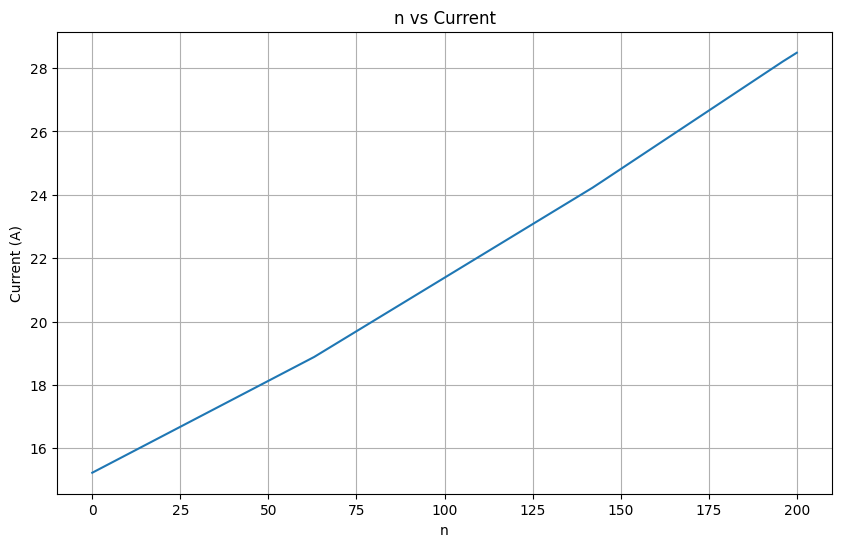

In [18]:
def plot_it(df):

    plt.figure(figsize=(10, 6))
    plt.plot(df['n'], df['current (A)'])
    plt.xlabel('n')
    plt.ylabel('Current (A)')
    plt.title('n vs Current')
    plt.grid(True)
    plt.show()


plot_it(df)

<h1>T2W 1.1?

In [ ]:
import numpy as np
import pandas as pd

# Data points
currents = np.array([1.04, 2.08, 3.52, 5.36, 7.4, 9.92, 14.04, 18.88, 24.24, 28.2, 30.44, 32.52])
thrusts  = np.array([0.321, 2.28, 4.622, 6.796, 9.033, 11.62, 15.525, 20.216, 24.673, 27.69, 29.497, 30.468])

g = 9.81
rows = []


for n in range(201):
    weight_kg = 1.7 + n * 0.00573
    weight_N = weight_kg * g
    thrust_N = 1.1 * weight_N  
    current_A = np.interp(thrust_N, thrusts, currents)
    rows.append({'n': n, 'weight (kg)': weight_kg, 'weight (N)': weight_N, 
                 'required thrust (N)': thrust_N, 'current (A)': current_A})


df = pd.DataFrame(rows)
df.to_excel('1_1T2W.xlsx', index=False)